<a href="https://colab.research.google.com/github/Kalisa21/salary/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv('/content/Salary Data.csv')

In [56]:
data.shape

(375, 6)

In [57]:
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [58]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


from object to int

In [60]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()


# Encode the object columns
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Education Level'] = label_encoder.fit_transform(data['Education Level'])
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])

print(data.head())
print(data.dtypes)
data.info()

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0
Age                    float64
Gender                   int64
Education Level          int64
Job Title                int64
Years of Experience    float64
Salary                 float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int6

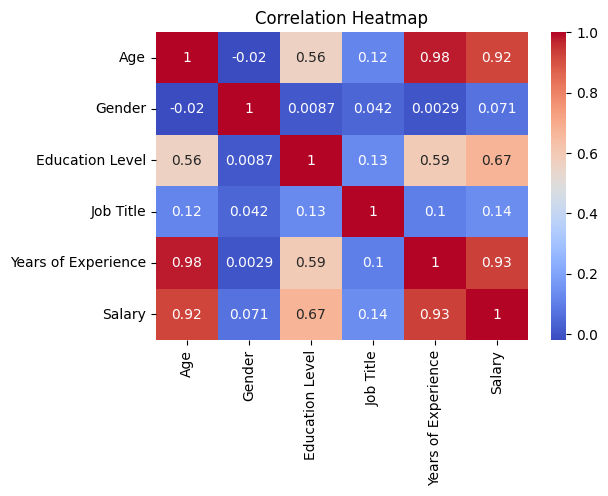

In [61]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

standarscale

In [62]:
from sklearn.preprocessing import StandardScaler
import joblib
X = data.drop(['Salary' ], axis=1)
y = data['Salary']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.joblib')
print(X_scaled)

[[-0.76939807  0.9258771  -0.7396685   1.46802292 -0.76827558]
 [-1.33600316 -1.03572692  0.60681542 -1.57085986 -1.07370248]
 [ 1.07206849  0.9258771   1.95329933  0.84740602  0.75885893]
 ...
 [-1.19435189 -1.03572692 -0.7396685  -0.43662896 -1.22641593]
 [-0.48609552  0.9258771  -0.7396685   0.9972101  -0.46284867]
 [ 0.93041721 -1.03572692  1.95329933  0.41939436  0.75885893]]


linear regression gradient descent

Final parameters (theta): [nan nan nan nan nan nan]


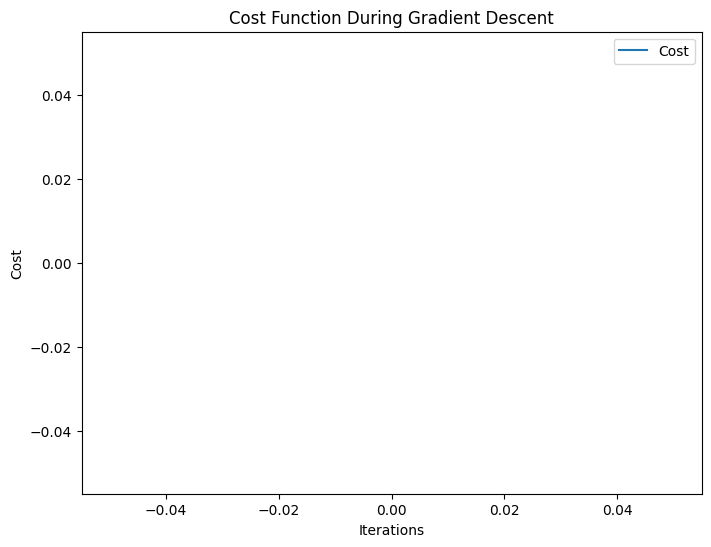

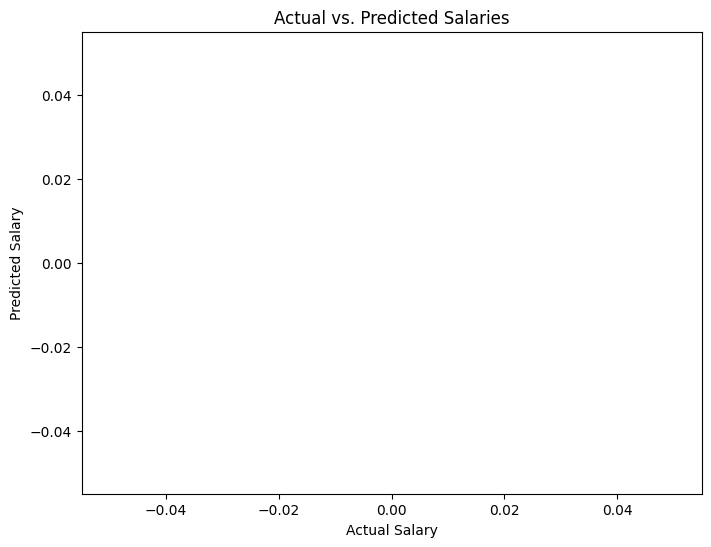

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Convert X_scaled and y to numpy arrays for processing
X_scaled = np.array(X_scaled)
y = np.array(y)

# Add an intercept term (bias) to X_scaled
m = X_scaled.shape[0]  # Number of samples
X_scaled = np.hstack((np.ones((m, 1)), X_scaled))  # Add bias term as the first column

# Initialize parameters (weights)
theta = np.zeros(X_scaled.shape[1])

# Define hyperparameters
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

# Store the cost history
cost_history = []

# Gradient Descent
for i in range(num_iterations):
    # Compute predictions
    predictions = np.dot(X_scaled, theta)

    # Compute the error
    error = predictions - y

    # Calculate the cost (Mean Squared Error)
    cost = (1 / (2 * m)) * np.dot(error.T, error)
    cost_history.append(cost)

    # Compute gradients
    gradients = (1 / m) * np.dot(X_scaled.T, error)

    # Update parameters
    theta -= alpha * gradients

# Final parameters
print("Final parameters (theta):", theta)

# Plot the cost history
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), cost_history, label="Cost")
plt.title("Cost Function During Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Predict values
predicted_salaries = np.dot(X_scaled, theta)

# Scatter plot of actual vs. predicted salaries
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_salaries, alpha=0.5)
plt.title("Actual vs. Predicted Salaries")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


decision trees

In [64]:
# Drop rows where Salary is NaN
data = data.dropna(subset=['Salary'])

# Re-define X and y
X = data.drop(['Salary'], axis=1)
y = data['Salary']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with NaN in Salary (target variable)
data = data.dropna(subset=['Salary'])

# Re-define X and y
X = data.drop(['Salary'], axis=1)
y = data['Salary']

# Ensure consistent number of rows by checking for NaN in features
X = X.dropna()
y = y[X.index]  # Ensure target aligns with feature index after dropping

# Apply scaling after handling NaN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 264666666.66666666
R2 Score: 0.8896110155415826


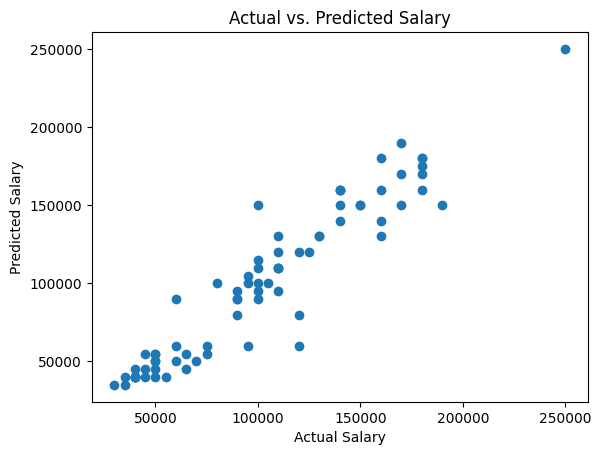

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

linear regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 249075656.42722106
R^2 Score: 0.8961138207821866


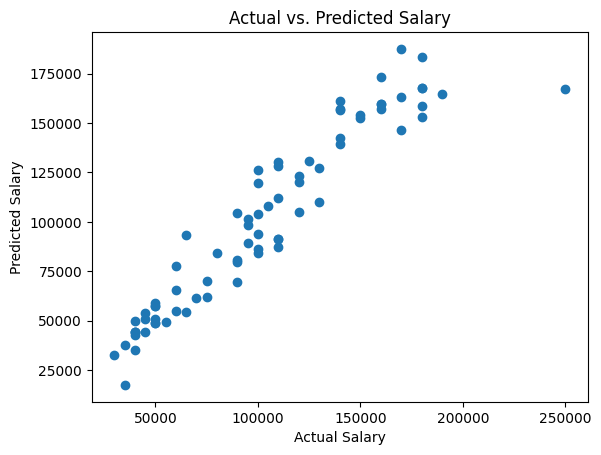

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

random forest

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Mean Squared Error: 143665122.08974168
R^2 Score: 0.9400791677723634


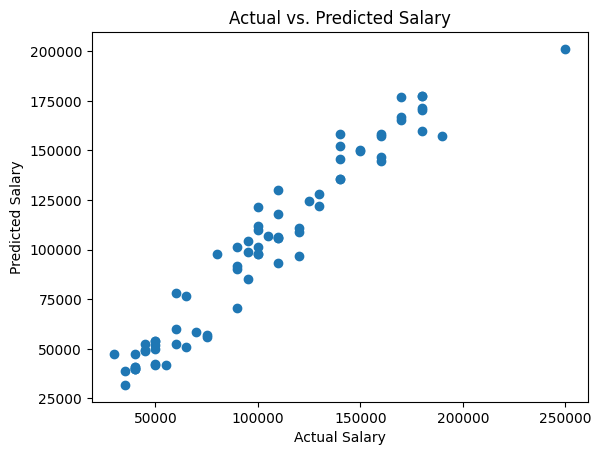

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

saving best m0del

In [71]:
from joblib import dump

# Save the Decision Tree model
dump(model, 'decision_tree_model.joblib')

print("Model saved as 'decision_tree_model.joblib'")


Model saved as 'decision_tree_model.joblib'


prediction

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Load the data
data = pd.read_csv('Salary Data.csv')

# Drop rows where Salary or any feature is NaN
data = data.dropna()

# Encode categorical features
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

label_encoder_education = LabelEncoder()
data['Education Level'] = label_encoder_education.fit_transform(data['Education Level'])

label_encoder_job_title = LabelEncoder()
data['Job Title'] = label_encoder_job_title.fit_transform(data['Job Title'])

# Define features and target
X = data.drop(['Salary'], axis=1)
y = data['Salary']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Function for user input and salary prediction
def predict_salary(age, gender, education_level, job_title, years_of_experience):
    # Preprocess input: Convert to DataFrame with column names
    input_data = pd.DataFrame(
        [[age, gender, education_level, job_title, years_of_experience]],
        columns=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
    )
    input_scaled = scaler.transform(input_data)

    # Predict salary
    predicted_salary = model.predict(input_scaled)
    return predicted_salary[0]

# Collect user inputs with textual mapping
def get_valid_input(prompt, mapping=None, condition=None, error_message="Invalid input."):
    while True:
        try:
            value = input(prompt)
            if mapping:  # If a mapping dictionary is provided
                value = mapping.get(value.strip().lower())
                if value is None:
                    raise ValueError("Value not found in mapping.")
            elif condition:  # If a validation condition is provided
                value = float(value)
                if not condition(value):
                    raise ValueError(error_message)
            return value
        except ValueError:
            print(error_message)

# Collect user inputs
age = get_valid_input(
    "Enter Age (23-53): ",
    condition=lambda x: 23 <= x <= 53,
    error_message="Age must be between 23 and 53."
)

gender = get_valid_input(
    "Enter Gender (Male/Female): ",
    mapping={'male': 1, 'female': 0},
    error_message="Gender must be 'Male' or 'Female'."
)

education_level = get_valid_input(
    "Enter Education Level (High School, Bachelor's, Master's, Doctorate): ",
    mapping={
        "high school": 0,
        "bachelor's": 1,
        "master's": 2,
        "doctorate": 3
    },
    error_message="Invalid Education Level. Choose from 'High School', 'Bachelor's', 'Master's', 'Doctorate'."
)

# Validate job title input without suggesting options
job_title_mapping = {name.lower(): idx for idx, name in enumerate(label_encoder_job_title.classes_)}
job_title = get_valid_input(
    "Enter Job Title: ",
    mapping=job_title_mapping,
    error_message="Invalid Job Title. Please ensure it matches one of the available titles in the dataset."
)

# Restrict Years of Experience to 0-25
years_of_experience = get_valid_input(
    "Enter Years of Experience (0-25): ",
    condition=lambda x: 0 <= x <= 25,
    error_message="Years of Experience must be between 0 and 25."
)

# Predict salary
predicted_salary = predict_salary(age, gender, education_level, job_title, years_of_experience)
print(f"\nPredicted Salary: ${predicted_salary:.2f}")


Enter Age (23-53): 23
Enter Gender (Male/Female): male
Enter Education Level (High School, Bachelor's, Master's, Doctorate): high school
Enter Job Title: software engineer
Enter Years of Experience (0-25): 23

Predicted Salary: $80000.00
